In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 242s 1us/step


In [5]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
import matplotlib.pyplot as plt

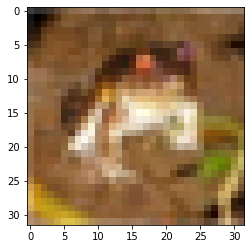

In [12]:
img = plt.imshow(X_train[0])

In [13]:
print('labels is:', y_train[0])

labels is: [6]


In [15]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
print('the one hot label is:', y_train_one_hot[0])

the one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [25]:
model = Sequential()
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )
model.add( MaxPooling2D(pool_size=(2,2)))

model.add( Flatten() )
model.add( Dense(1000, activation='relu'))
model.add( Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 249s 7ms/step - loss: 1.6960 - accuracy: 0.3852 - val_loss: 1.5111 - val_accuracy: 0.4497
Epoch 2/10
35000/35000 [==============================] - 123s 4ms/step - loss: 1.3555 - accuracy: 0.5162 - val_loss: 1.3050 - val_accuracy: 0.5398
Epoch 3/10
35000/35000 [==============================] - 83s 2ms/step - loss: 1.2120 - accuracy: 0.5705 - val_loss: 1.1986 - val_accuracy: 0.5763
Epoch 4/10
35000/35000 [==============================] - 117s 3ms/step - loss: 1.1181 - accuracy: 0.6055 - val_loss: 1.1343 - val_accuracy: 0.6035
Epoch 5/10
35000/35000 [==============================] - 94s 3ms/step - loss: 1.0222 - accuracy: 0.6398 - val_loss: 1.0883 - val_accuracy: 0.6239
Epoch 6/10
35000/35000 [==============================] - 107s 3ms/step - loss: 0.9620 - accuracy: 0.6647 - val_loss: 1.0311 - val_accuracy: 0.6454
Epoch 7/10
35000/35000 [==============================] - 86s 2m

In [28]:
model.evaluate(X_test, y_test_one_hot)[1]

10000/10000 [==============================] - 13s 1ms/step


0.6739000082015991

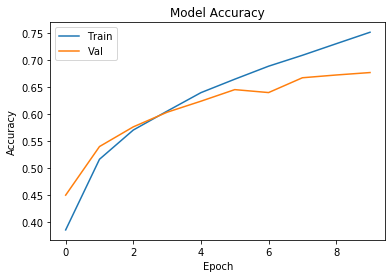

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

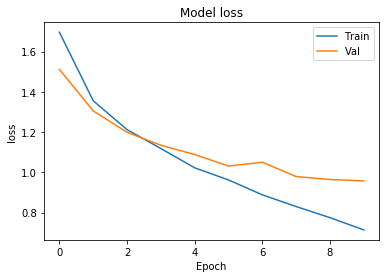

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()